In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

def check_values(df, columns):
    for col in columns:
        print(f"unique value : {df[col].unique()}")
        print(f"Value count : {df[col].value_counts()}")
        print(f"Total unique number : {df[col].nunique()}")
        print(f"Total null value: {df[col].isnull().sum()}")
        print(f"Null data : {df[df[col].isnull()]}")

In [31]:
df = pd.read_csv("loan_approval_dataset.csv")
#remove whitespace on column names
df.columns = df.columns.str.strip().str.lower()

categorical_col = df.select_dtypes(include=object).columns
df[categorical_col] = df[categorical_col].apply(lambda x: x.str.strip())

print(df.info())
print(df.shape)
print(f"Null value : {df.isnull().sum()}")
print(f"Duplicated value : {df.duplicated().sum()}")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
(4269, 13)
Null value : l

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [32]:
# is the dataset balanced or imbalanced?
df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

C:\Users\buyan\AppData\Local\Temp\ipykernel_41260\1412525992.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


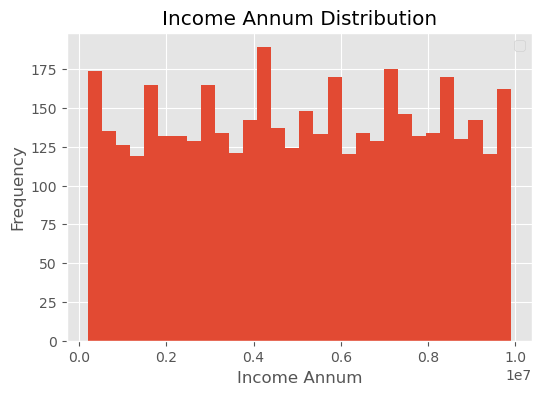

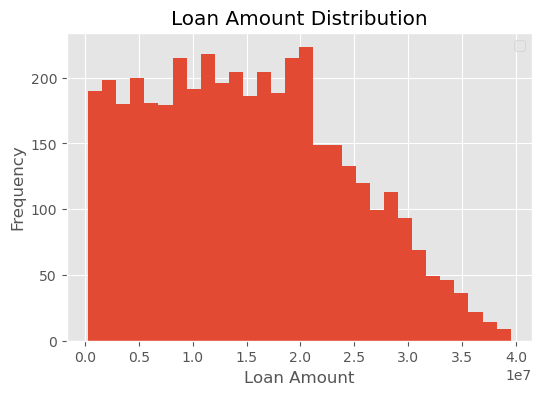

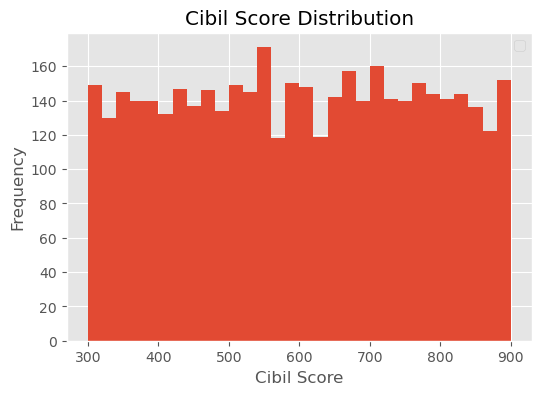

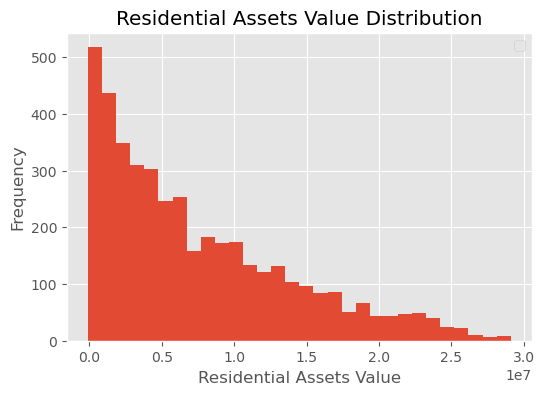

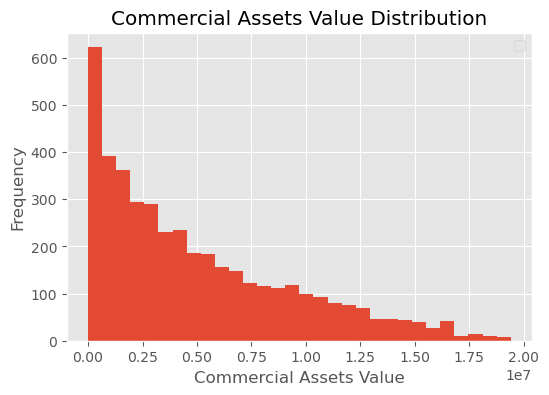

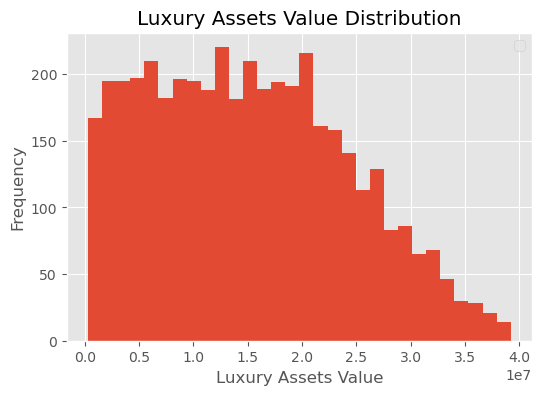

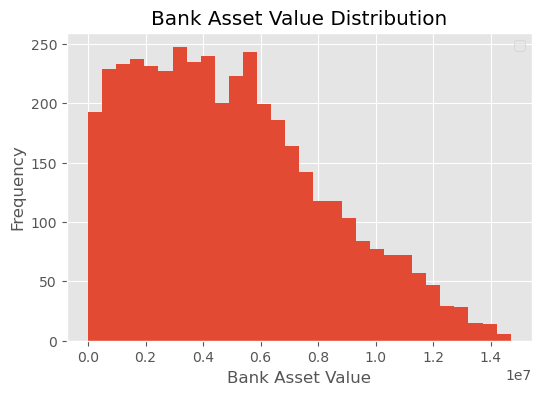

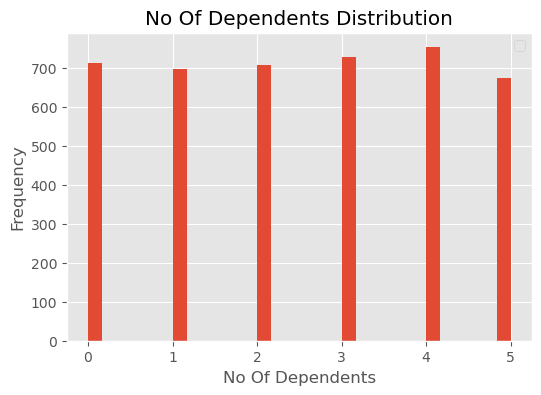

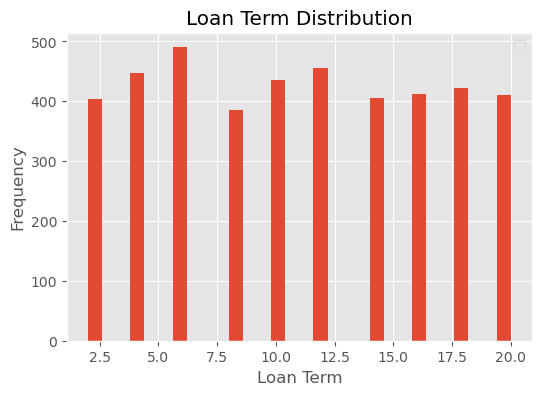

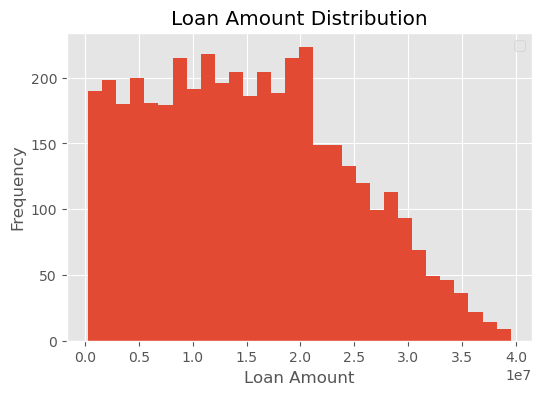

In [33]:
num_features = ['income_annum', 'loan_amount', 'cibil_score','residential_assets_value','commercial_assets_value',
                'luxury_assets_value','bank_asset_value','no_of_dependents','loan_term','loan_amount']

for col in num_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30) 
    plt.title(f'{col.replace("_"," ").title()} Distribution')   
    plt.xlabel(col.replace("_"," ").title())
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

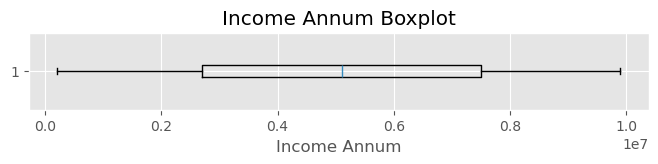

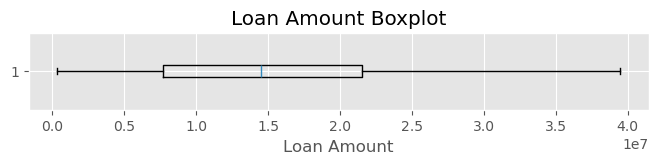

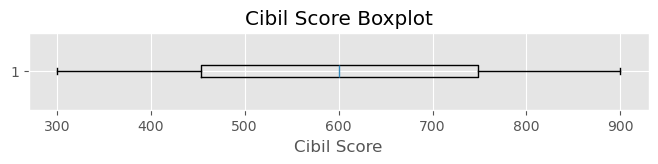

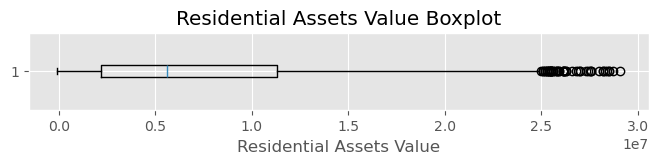

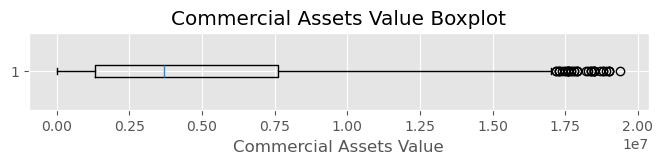

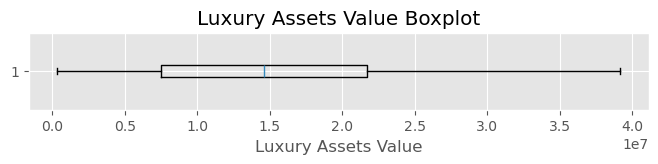

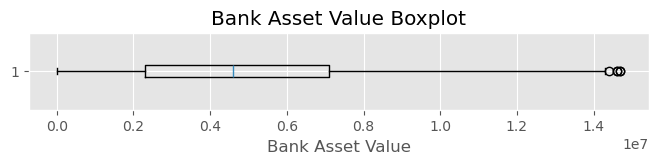

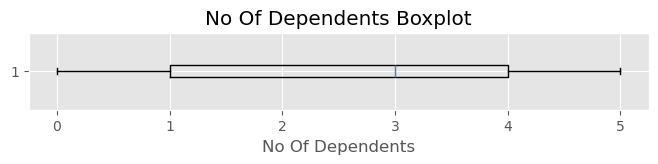

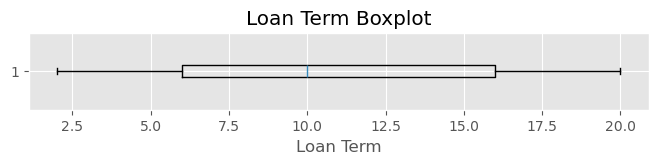

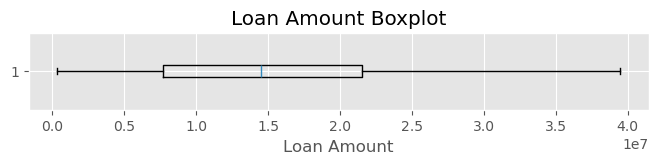

In [34]:
# To check outlier
#print(df[num_features].describe())
for col in num_features:
    plt.figure(figsize=(8,1))
    plt.boxplot(df[col], vert=False)
    plt.title(f'{col.replace("_"," ").title()} Boxplot')
    plt.xlabel(col.replace("_"," ").title())
    plt.show()

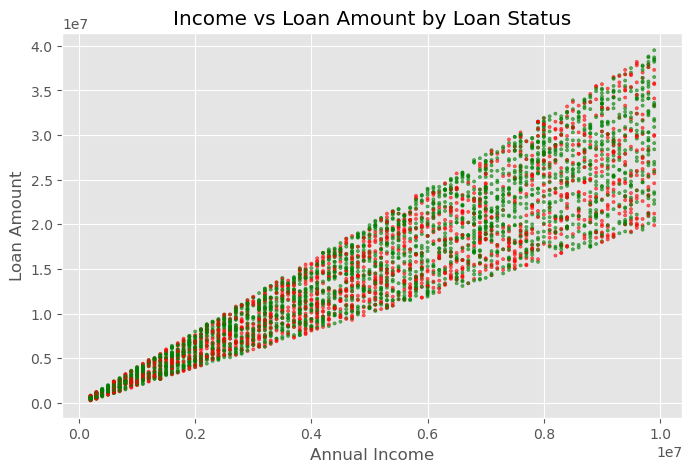

In [35]:
colors = df['loan_status'].map({'Approved':'green', 'Rejected':'red'})

plt.figure(figsize=(8,5))
plt.scatter(df['income_annum'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

In [36]:
df['total_assets'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)

df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df['assets_to_loan_ratio'] = df['total_assets'] / df['loan_amount']

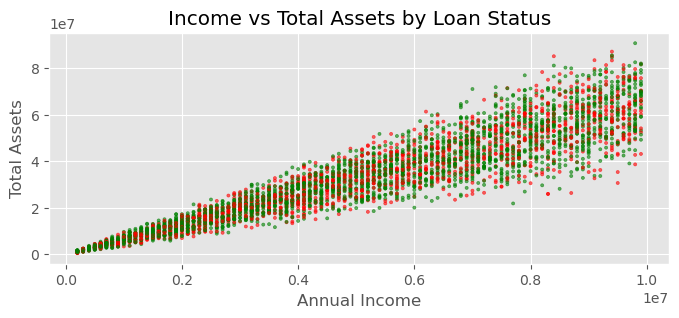

In [37]:
plt.figure(figsize=(8,3))
plt.scatter(df['income_annum'], df['total_assets'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Total Assets')
plt.title('Income vs Total Assets by Loan Status')
plt.show()

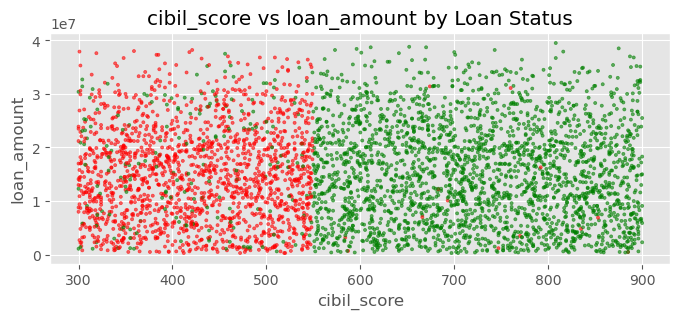

In [38]:
plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('loan_amount')
plt.title('cibil_score vs loan_amount by Loan Status')
plt.show()

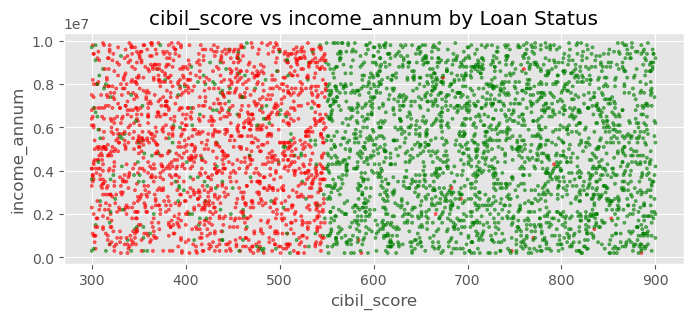

In [39]:
plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['income_annum'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('income_annum')
plt.title('cibil_score vs income_annum by Loan Status')
plt.show()

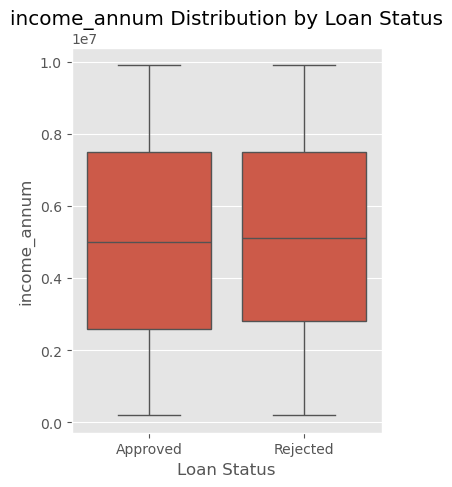

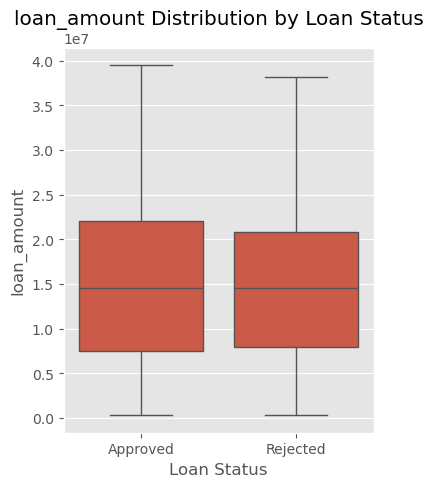

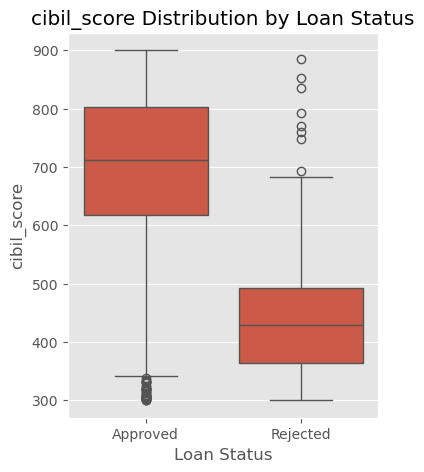

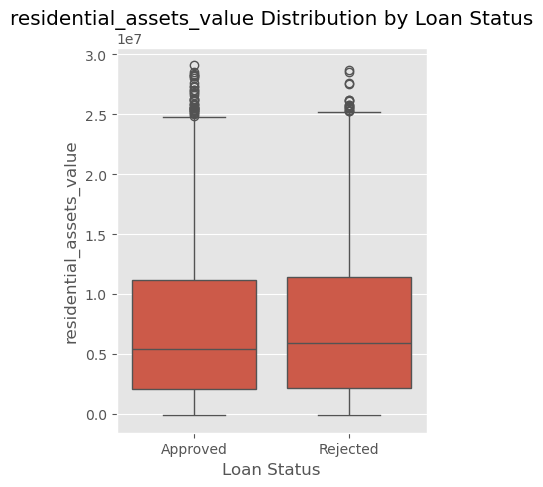

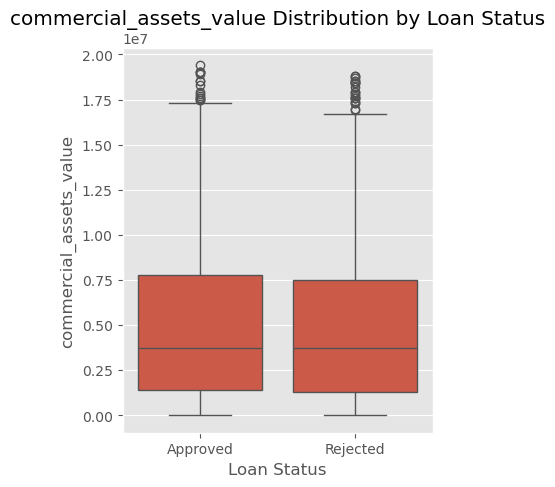

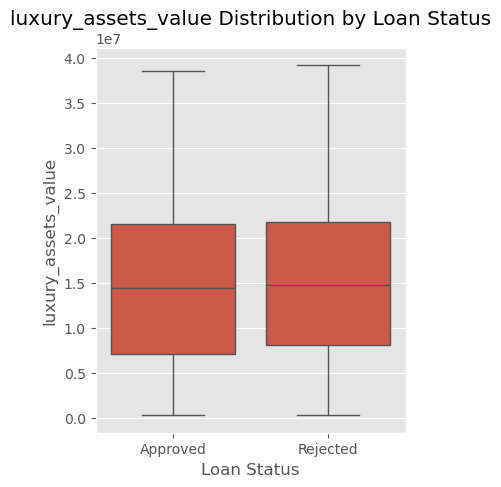

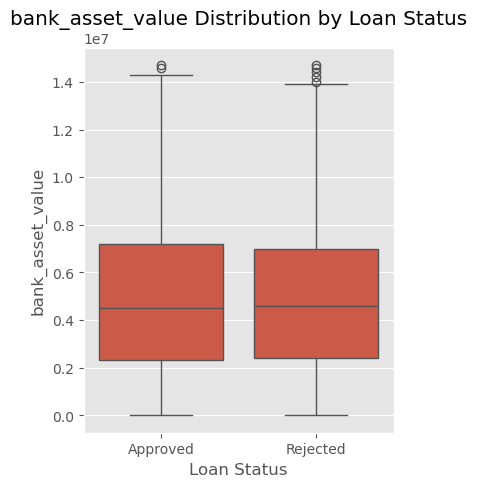

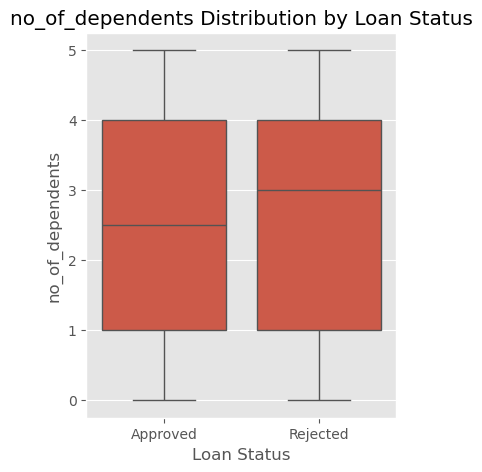

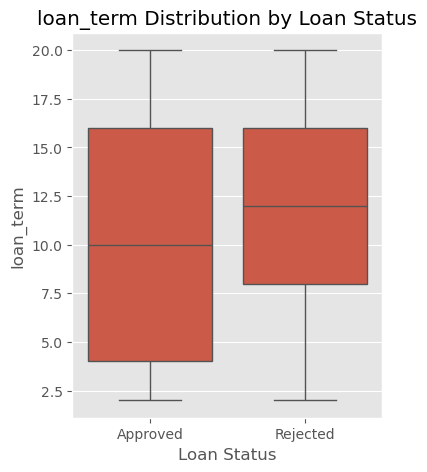

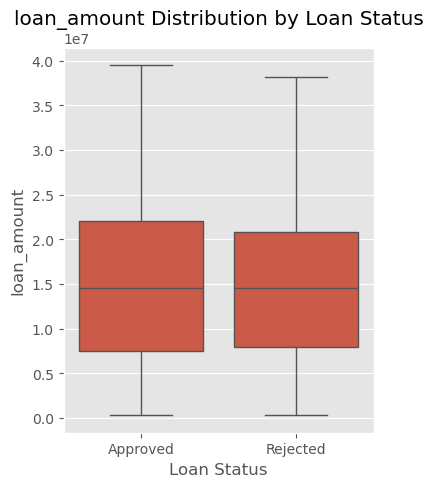

In [40]:
#Bivariate Analysis (Feature vs Loan Status)
for col in num_features:
    plt.figure(figsize=(4,5))
    sns.boxplot(x='loan_status',y=col,data=df)
    
    plt.title(f"{col} Distribution by Loan Status")
    plt.xlabel('Loan Status')
    plt.ylabel(f"{col}")
    plt.show()


In [41]:
# sns.pairplot(df,vars=num_features,hue='loan_status')
# plt.show()

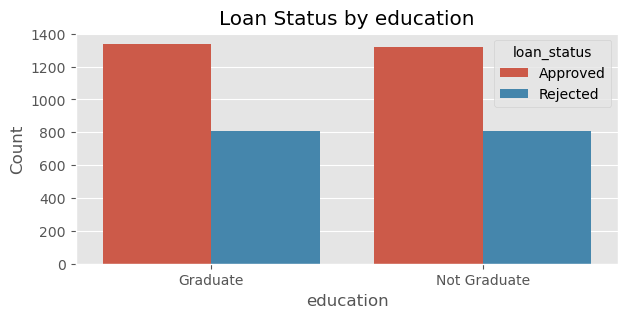

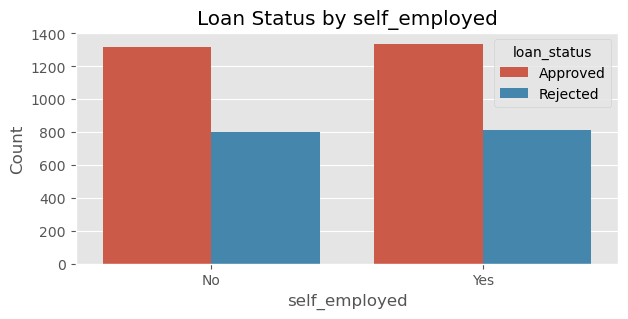

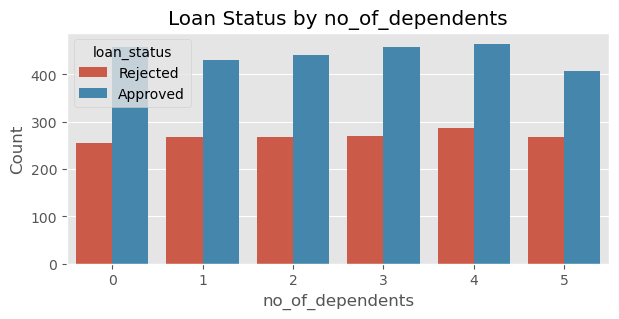

In [42]:
cat_features = ['education', 'self_employed', 'no_of_dependents']
for col in cat_features:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df,x=col,hue='loan_status')
    plt.title('Loan Status by '+col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [43]:
# feature engineering


In [56]:
import pandas as pd
import numpy as np

df = pd.read_csv("loan_approval_dataset.csv")

# Clean column names just in case
df.columns = [c.strip() for c in df.columns]

# Strip categorical spaces (you already do something similar)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# Target -> 0/1 (adjust mapping if your labels differ)
df["loan_status"] = df["loan_status"].map({"Approved": 1, "Rejected": 0})

# --- Feature engineering ---
asset_cols = ["residential_assets_value", "commercial_assets_value",
              "luxury_assets_value", "bank_asset_value"]

df["total_assets"] = df[asset_cols].sum(axis=1)

# Avoid divide-by-zero
df["LIR"] = df["loan_amount"] / df["income_annum"].replace(0, np.nan)
df["ALR"] = df["total_assets"] / df["loan_amount"].replace(0, np.nan)

# Fill inf/nan created by ratios (simple approach)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[["LIR", "ALR"]] = df[["LIR", "ALR"]].fillna(df[["LIR", "ALR"]].median())


In [57]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,LIR,ALR
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,1.695652
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975610,1.393443
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,1.942761
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,1.716612
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0,7400000,2.300000,3.217391
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,20000000,3.424242,1.769912
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,39000000,3.676923,1.631799
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,28800000,3.121951,2.250000


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

target = "loan_status"
X = df.drop(columns=[target])
y = df[target]

# Identify columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# Preprocessor: OneHot for categorical + scaling for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="drop"
)


In [59]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Transform X into numeric matrix
X_processed = preprocessor.fit_transform(X)

# PCA (optional but recommended for clustering)
pca = PCA(n_components=0.90, random_state=42)  # keep 90% variance
X_pca = pca.fit_transform(X_processed)

# KMeans clustering
k = 4  # you can test 3–5
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_pca)

df["cluster_id"] = clusters


C:\Users\buyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(



Baseline Random Forest Confusion Matrix:
[[322   1]
 [  0 531]]


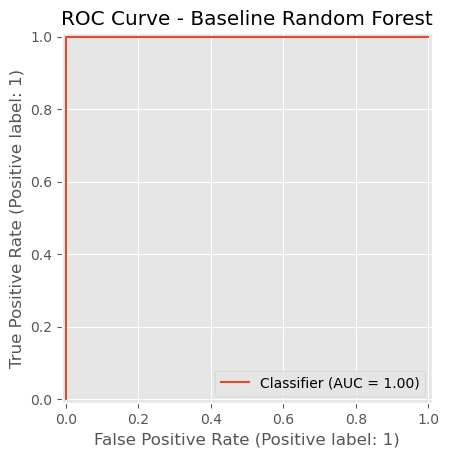


Hybrid Random Forest (with cluster_id) Confusion Matrix:
[[322   1]
 [  0 531]]


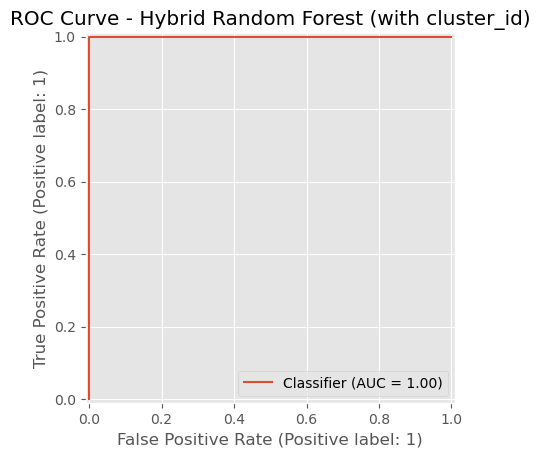

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Baseline Random Forest,0.998829,0.99812,1.0,0.999059,1.0
1,Hybrid Random Forest (with cluster_id),0.998829,0.99812,1.0,0.999059,1.0


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    results = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred, zero_division=0),
        "Recall": recall_score(y_test, pred, zero_division=0),
        "F1": f1_score(y_test, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, proba)
    }

    cm = confusion_matrix(y_test, pred)
    print(f"\n{name} Confusion Matrix:\n{cm}")

    RocCurveDisplay.from_predictions(y_test, proba)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    return results


# Split (use same split for both models)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target])

# --- Baseline (WITHOUT cluster_id) ---
X_train_base = train_df.drop(columns=[target, "cluster_id"])
y_train = train_df[target]
X_test_base = test_df.drop(columns=[target, "cluster_id"])
y_test = test_df[target]

baseline_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])

# --- Hybrid (WITH cluster_id) ---
X_train_hybrid = train_df.drop(columns=[target])
X_test_hybrid = test_df.drop(columns=[target])

# Need a new preprocessor including cluster_id (numeric)
categorical_cols_h = X_train_hybrid.select_dtypes(include="object").columns.tolist()
numeric_cols_h = [c for c in X_train_hybrid.columns if c not in categorical_cols_h]

preprocessor_hybrid = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols_h),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_h)
    ],
    remainder="drop"
)

hybrid_model = Pipeline(steps=[
    ("preprocess", preprocessor_hybrid),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])

# Evaluate both
baseline_results = evaluate_model("Baseline Random Forest", baseline_model,
                                  X_train_base, X_test_base, y_train, y_test)

hybrid_results = evaluate_model("Hybrid Random Forest (with cluster_id)", hybrid_model,
                                X_train_hybrid, X_test_hybrid, y_train, y_test)

pd.DataFrame([baseline_results, hybrid_results])


ROC–AUC = 1.0 → near-perfect class separation
Baseline = Hybrid → clustering does not improve prediction, but still helps interpretation

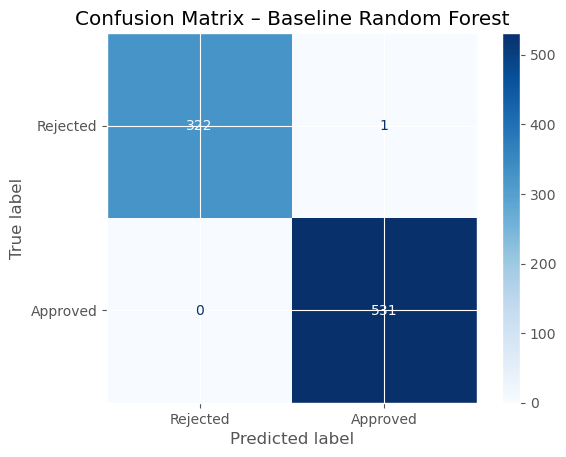

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit baseline model (if not already fitted)
baseline_model.fit(X_train_base, y_train)

# Predictions
y_pred = baseline_model.predict(X_test_base)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Rejected", "Approved"],
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – Baseline Random Forest")
plt.show()


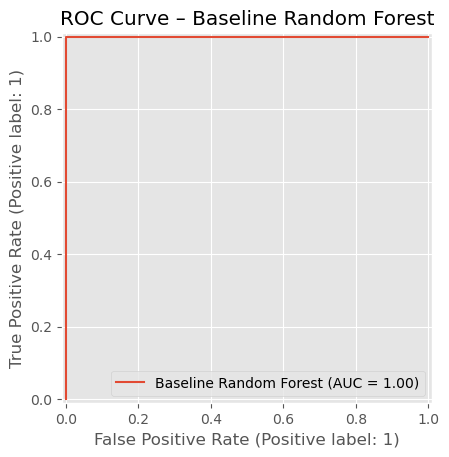

In [68]:
from sklearn.metrics import RocCurveDisplay

# Predicted probabilities
y_proba = baseline_model.predict_proba(X_test_base)[:, 1]

# Plot ROC curve
RocCurveDisplay.from_predictions(
    y_test,
    y_proba,
    name="Baseline Random Forest"
)

plt.title("ROC Curve – Baseline Random Forest")
plt.show()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fit the baseline model if not already fitted
baseline_model.fit(X_train_base, y_train)

# Get trained Random Forest
rf_model = baseline_model.named_steps["rf"]

# Get feature names after preprocessing
preprocessor = baseline_model.named_steps["preprocess"]

num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][2]

# Get one-hot encoded feature names
cat_ohe = preprocessor.transformers_[1][1]
cat_feature_names = cat_ohe.get_feature_names_out(cat_features)

# Combine all feature names
feature_names = np.concatenate([num_features, cat_feature_names])


In [70]:
importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


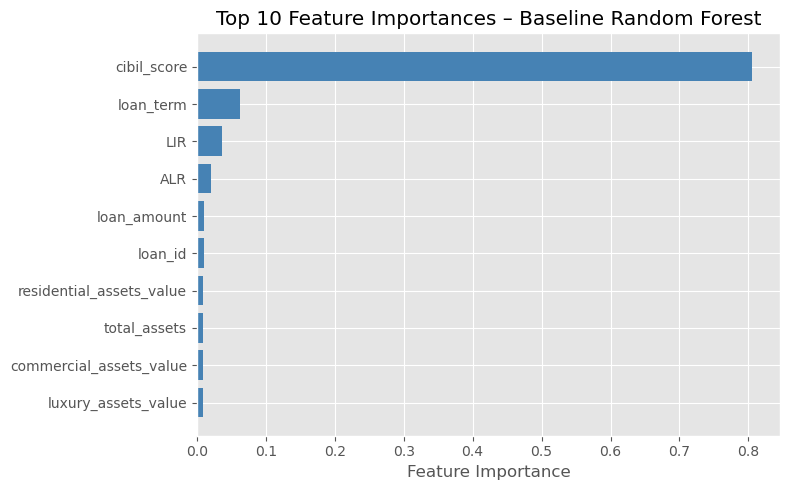

In [71]:
plt.figure(figsize=(8, 5))

plt.barh(
    fi_df["Feature"].head(10)[::-1],
    fi_df["Importance"].head(10)[::-1],
    color="steelblue"
)

plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances – Baseline Random Forest")
plt.tight_layout()
plt.show()


Top feature importances figure illustrates the top ten feature importances derived from the Random Forest classifier. Credit score (CIBIL) emerged as the most influential predictor of loan approval, followed by affordability and asset-based ratios such as Loan-to-Income Ratio and Assets-to-Loan Ratio. This confirms that loan approval decisions are primarily driven by creditworthiness and repayment capacity, explaining the high predictive performance observed.

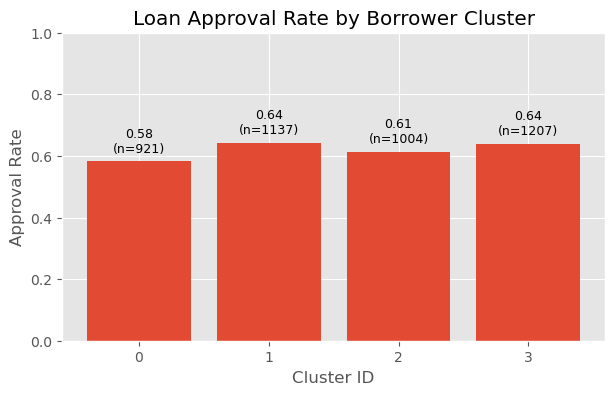

In [73]:
plt.figure(figsize=(7,4))
bars = plt.bar(cluster_summary["cluster_id"].astype(str), cluster_summary["approval_rate"])
plt.ylim(0, 1)
plt.xlabel("Cluster ID")
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Borrower Cluster")

for b, rate, n in zip(bars, cluster_summary["approval_rate"], cluster_summary["n"]):
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.02, f"{rate:.2f}\n(n={n})",
             ha="center", va="bottom", fontsize=9)

plt.show()


In [74]:
key_features = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "total_assets", "LIR", "ALR"
]

profile_mean = df.groupby("cluster_id")[key_features].mean().round(2)
profile_median = df.groupby("cluster_id")[key_features].median().round(2)

display(profile_mean)
display(profile_median)


,income_annum,loan_amount,loan_term,cibil_score,total_assets,LIR,ALR
cluster_id,,,,,,,
0,4104994.57,9866666.67,10.57,596.72,27241476.66,2.40,2.86
1,6290413.37,20859366.75,10.89,598.47,36291380.83,3.35,1.78
2,8399701.20,24572908.37,11.10,595.25,59298705.18,2.93,2.51
3,1848550.12,5906545.15,11.00,607.66,10821955.26,3.14,1.94


,income_annum,loan_amount,loan_term,cibil_score,total_assets,LIR,ALR
cluster_id,,,,,,,
0,4100000.0,10500000.0,10.0,594.0,27300000.0,2.35,2.80
1,6200000.0,19800000.0,10.0,595.0,36400000.0,3.42,1.78
2,8600000.0,23900000.0,11.0,599.5,57900000.0,2.89,2.42
3,1800000.0,5300000.0,10.0,611.0,10200000.0,3.18,1.91


In [75]:
cluster_profile = df.groupby("cluster_id").agg(
    n=("loan_status", "count"),
    approval_rate=("loan_status", "mean"),
    income_mean=("income_annum", "mean"),
    loan_mean=("loan_amount", "mean"),
    cibil_mean=("cibil_score", "mean"),
    LIR_mean=("LIR", "mean"),
    ALR_mean=("ALR", "mean"),
    assets_mean=("total_assets", "mean"),
).round(3)

cluster_profile


,n,approval_rate,income_mean,loan_mean,cibil_mean,LIR_mean,ALR_mean,assets_mean
cluster_id,,,,,,,,
0,921,0.583,4104994.571,9.866667e+06,596.722,2.396,2.863,2.724148e+07
1,1137,0.643,6290413.369,2.085937e+07,598.474,3.347,1.785,3.629138e+07
2,1004,0.614,8399701.195,2.457291e+07,595.253,2.926,2.512,5.929871e+07
3,1207,0.640,1848550.124,5.906545e+06,607.661,3.141,1.938,1.082196e+07


In [76]:
overall = df[key_features].mean()
delta = profile_mean - overall
delta.round(2)


,income_annum,loan_amount,loan_term,cibil_score,total_assets,LIR,ALR
cluster_id,,,,,,,
0,-954129.35,-5266783.79,-0.33,-3.22,-5307293.54,-0.58,0.63
1,1231289.45,5725916.29,-0.01,-1.47,3742610.63,0.37,-0.45
2,3340577.28,9439457.91,0.20,-4.69,26749934.98,-0.05,0.28
3,-3210573.80,-9226905.31,0.10,7.72,-21726814.94,0.16,-0.29
